<a href="https://colab.research.google.com/github/nehaal10/Predicting-placements-/blob/main/College_Placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/collegePlace.csv')

In [ ]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [ ]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
categorial_column=list(data.select_dtypes(include=['O']).columns)

In [ ]:
categorial_column

['Gender', 'Stream']

In [ ]:
bar_plot=px.bar(data,x='Internships',y='PlacedOrNot')
bar_plot.show()

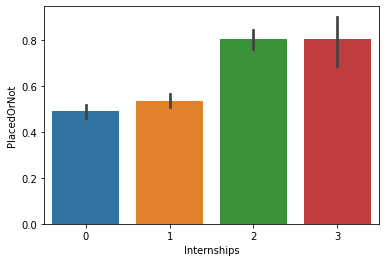

In [ ]:
sns.barplot(x='Internships',y='PlacedOrNot',data=data)

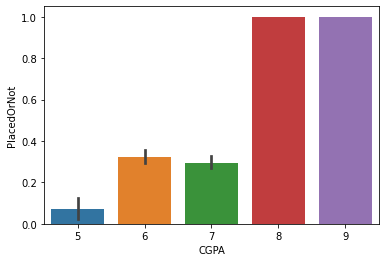

In [ ]:
sns.barplot(x='CGPA',y='PlacedOrNot',data=data)


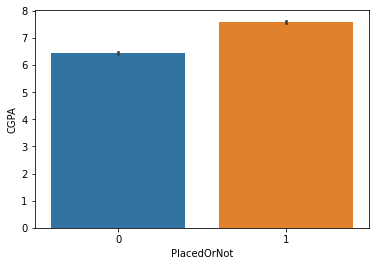

In [ ]:
sns.barplot(x='PlacedOrNot',y='CGPA',data=data)

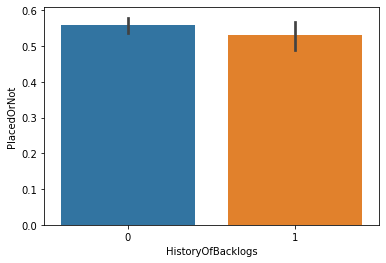

In [ ]:
sns.barplot(x='HistoryOfBacklogs',y='PlacedOrNot',data=data)

In [ ]:
numbered_col=list(data.select_dtypes(include=['int64','float64']).columns[1:])
col=numbered_col.pop()

In [ ]:
label=LabelEncoder()
data['Gender']=label.fit_transform(data['Gender'])
dumies=pd.get_dummies(data['Stream'])
data=pd.concat([data,dumies],axis='columns')


In [ ]:
data.drop('Stream',axis=1,inplace=True)

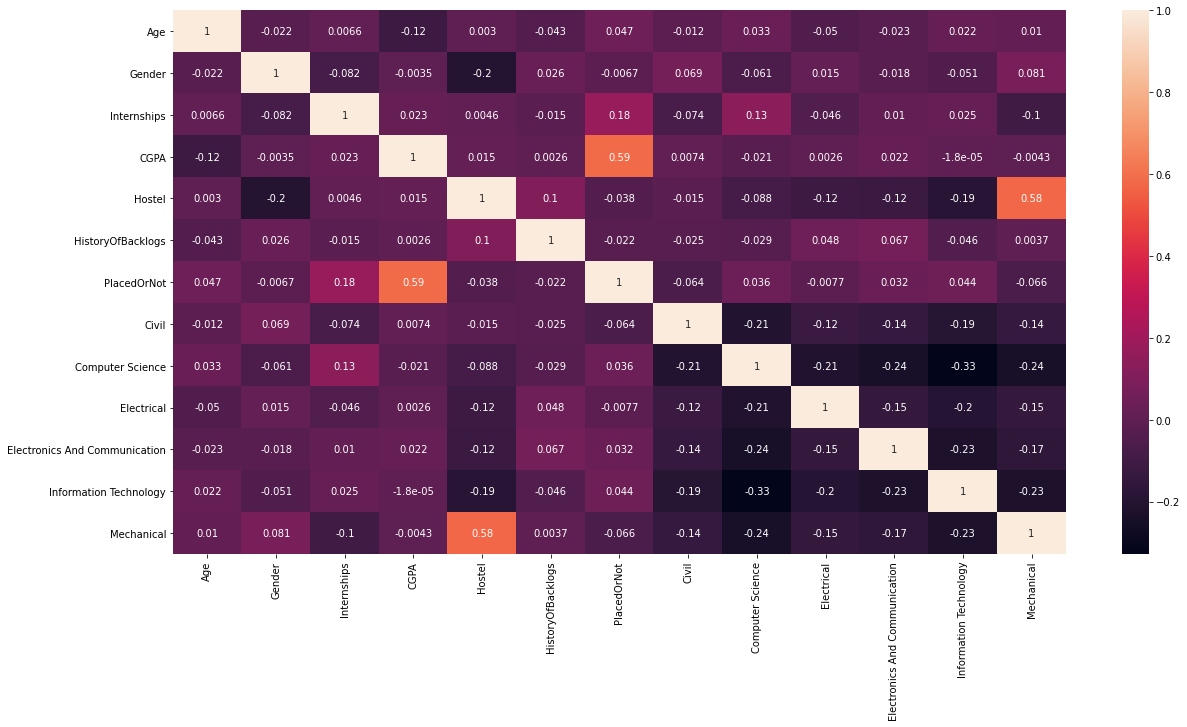

In [ ]:
plt.figure(figsize=(20,10))
data_corr=data.corr()
sns.heatmap(data_corr,annot=True)

In [ ]:
data.describe()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,0.703641,7.073837,0.269049,0.192178,0.552596,0.106878,0.261632,0.112610,0.142953,0.232974,0.142953
std,1.324933,0.371732,0.740197,0.967748,0.443540,0.394079,0.497310,0.309010,0.439597,0.316168,0.350084,0.422797,0.350084
min,19.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,1.000000,1.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
percent_for_cv=len(data)-int(2966*0.1)
df_cv=data.head(2670)
df_train=data[data.index>2670]

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
2671,21,0,0,7,1,0,0,0,1,0,0,0,0
2672,20,0,1,7,0,0,1,0,0,1,0,0,0
2673,20,1,1,8,1,0,1,0,0,0,0,1,0
2674,21,0,0,7,0,0,1,0,0,0,1,0,0
2675,21,1,0,8,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,0,7,0,0,0,0,0,0,0,1,0
2962,23,1,1,7,1,0,0,0,0,0,0,0,1
2963,22,1,1,7,0,0,0,0,0,0,0,1,0
2964,22,1,1,7,0,0,0,0,1,0,0,0,0


In [ ]:
#cross validation
model_param={
    'LogisticRegression':{
        'model':LogisticRegression(solver='liblinear'),
        'params':{
            'C':[1.0,2.0,3.0,10.0,15.0,20.0]
        }
    },
    'SVC':{
        'model':SVC(gamma='auto',),
        'params':{
            'kernel':['linear','rbf','poly'],
            'C':[1.0,2.0,3.0,10.0,15.0,20.0]
        }
    }
}
x=df_cv.drop('PlacedOrNot',axis=1)
y=df_cv['PlacedOrNot']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,shuffle=True,random_state=1)

In [ ]:
score=[]
for model_name,param in model_param.items():
  rscv=RandomizedSearchCV(param['model'],param['params'],n_iter=3,cv=5,return_train_score=False)
  rscv.fit(xtrain,ytrain)
  score.append({
    'model':model_name,
    'best_score':rscv.best_score_,
    'best_param':rscv.best_params_
  })

In [ ]:
score

[{'best_param': {'C': 10.0},
  'best_score': 0.7527893277893278,
  'model': 'LogisticRegression'},
 {'best_param': {'C': 10.0, 'kernel': 'rbf'},
  'best_score': 0.8572531185031185,
  'model': 'SVC'}]

In [ ]:
#so we cam to know that svc is the best param 
x_test=df_train.drop('PlacedOrNot',axis=1)
y_test=df_train['PlacedOrNot']
sv=SVC(C= 10.0, kernel= 'rbf',gamma='auto')
sv.fit(xtrain,ytrain)
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred)
acc

0.9525423728813559